In [1]:
library(data.table)
library(sde)
library('tseries')
data = fread("hour.csv")
library('forecast')
library('tseries')
library('scales')
head(data)

Loading required package: MASS
Loading required package: stats4
Loading required package: fda
Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

sde 2.0.15
Companion package to the book
‘Simulation and Inference for Stochastic Differential Equations With R Examples’
Iacus, Springer NY, (2008)
To check the errata corrige of the book, type vignette("sde.errata")

Attaching package: ‘forecast’

The following object is masked from ‘package:fda’:

    fourier



instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [2]:
data1 = data

In [3]:
data1$dteday<-NULL
data1$instant<-NULL
data1$season<-NULL
data1$yr<-NULL
data1$mnth<-NULL
data1$hr<-NULL
head(data1)

holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


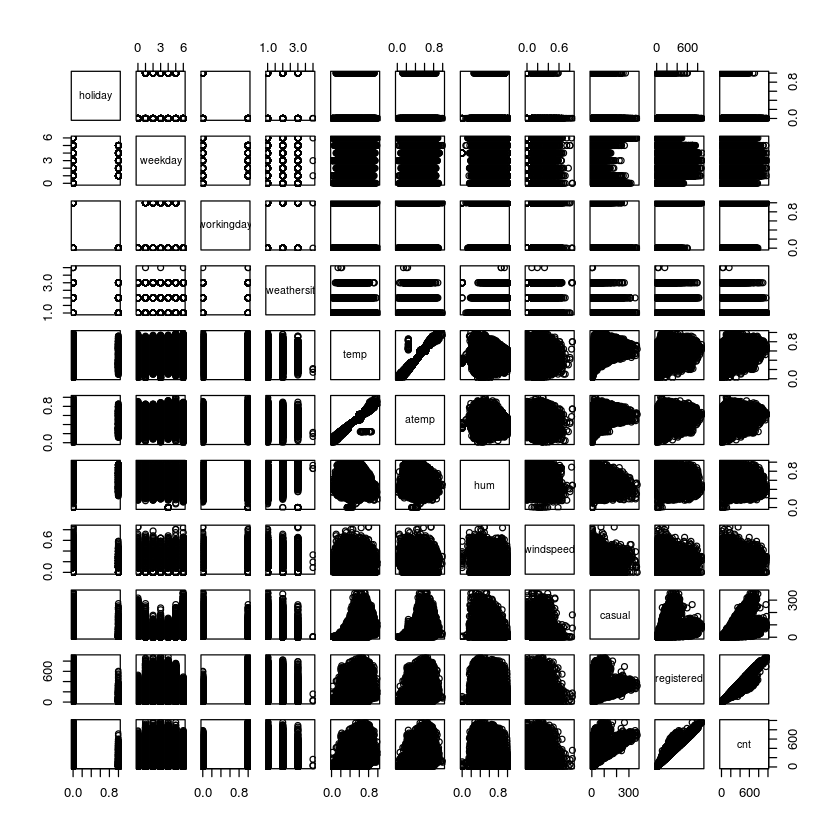

In [4]:
pairs(data1)

In [5]:
cor(data1,method="spearman")

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,1.000000000,-0.101856980,-0.25247137,-0.012917156,-0.028124615,-0.03146770,-0.01228764,0.004140643,0.01594326,-0.04352597,-0.02952613
weekday,-0.101856980,1.000000000,0.03504386,0.003277222,-0.005723666,-0.01297929,-0.03659844,0.009935628,0.01267196,0.03471108,0.03029665
workingday,-0.252471370,0.035043856,1.00000000,0.043874810,0.054965010,0.05410265,0.01732531,-0.010722818,-0.17667093,0.08310526,0.02103348
weathersit,-0.012917156,0.003277222,0.04387481,1.000000000,-0.104510498,-0.11114466,0.40936362,0.008302886,-0.16027981,-0.11206246,-0.12627556
temp,-0.028124615,-0.005723666,0.05496501,-0.104510498,1.000000000,0.98963287,-0.05540835,-0.009719194,0.57098864,0.37319610,0.42332952
atemp,-0.031467699,-0.012979293,0.05410265,-0.111144663,0.989632867,1.00000000,-0.05261712,-0.041091418,0.57041864,0.37301398,0.42325781
hum,-0.012287638,-0.036598444,0.01732531,0.409363619,-0.055408353,-0.05261712,1.00000000,-0.293912994,-0.38821325,-0.33848025,-0.35961419
windspeed,0.004140643,0.009935628,-0.01072282,0.008302886,-0.009719194,-0.04109142,-0.29391299,1.000000000,0.12291976,0.12293636,0.12662883
casual,0.015943256,0.012671963,-0.17667093,-0.160279806,0.570988639,0.57041864,-0.38821325,0.122919760,1.00000000,0.78106060,0.85052503
registered,-0.043525966,0.034711076,0.08310526,-0.112062457,0.373196100,0.37301398,-0.33848025,0.122936361,0.78106060,1.00000000,0.98944385


In [7]:
cor(data1)

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,1.000000000,-0.102087791,-0.25247137,-0.01703611,-0.027340477,-0.030972737,-0.01058846,0.003987632,0.03156363,-0.04734542,-0.03092730
weekday,-0.102087791,1.000000000,0.03595507,0.00331074,-0.001794927,-0.008820945,-0.03715827,0.011501545,0.03272142,0.02157789,0.02689986
workingday,-0.252471370,0.035955071,1.00000000,0.04467222,0.055390317,0.054667235,0.01568751,-0.011829789,-0.30094249,0.13432579,0.03028437
weathersit,-0.017036113,0.003310740,0.04467222,1.00000000,-0.102639936,-0.105563108,0.41813033,0.026225652,-0.15262788,-0.12096552,-0.14242614
temp,-0.027340477,-0.001794927,0.05539032,-0.10263994,1.000000000,0.987672139,-0.06988139,-0.023125262,0.45961565,0.33536085,0.40477228
atemp,-0.030972737,-0.008820945,0.05466723,-0.10556311,0.987672139,1.000000000,-0.05191770,-0.062336043,0.45408007,0.33255864,0.40092930
hum,-0.010588465,-0.037158268,0.01568751,0.41813033,-0.069881391,-0.051917696,1.00000000,-0.290104895,-0.34702809,-0.27393312,-0.32291074
windspeed,0.003987632,0.011501545,-0.01182979,0.02622565,-0.023125262,-0.062336043,-0.29010490,1.000000000,0.09028678,0.08232085,0.09323378
casual,0.031563628,0.032721415,-0.30094249,-0.15262788,0.459615646,0.454080065,-0.34702809,0.090286775,1.00000000,0.50661770,0.69456408
registered,-0.047345424,0.021577888,0.13432579,-0.12096552,0.335360849,0.332558635,-0.27393312,0.082320847,0.50661770,1.00000000,0.97215073


In [6]:
cor(data1,method="kendall")

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,1.000000000,-0.088908313,-0.252471370,-0.012543828,-0.023304542,-0.026036161,-0.01012084,0.003514342,0.013170171,-0.03561109,-0.02414780
weekday,-0.088908313,1.000000000,0.030588871,0.002897696,-0.004176142,-0.009481078,-0.02619592,0.007326943,0.009338119,0.02413868,0.02177237
workingday,-0.252471370,0.030588871,1.000000000,0.042606754,0.045544957,0.044764168,0.01427017,-0.009100917,-0.145941721,0.06799319,0.01720213
weathersit,-0.012543828,0.002897696,0.042606754,1.000000000,-0.084070580,-0.089312864,0.33147953,0.007005044,-0.129646371,-0.08952766,-0.10101259
temp,-0.023304542,-0.004176142,0.045544957,-0.084070580,1.000000000,0.955403089,-0.03861436,-0.006230924,0.409301394,0.25445617,0.29091061
atemp,-0.026036161,-0.009481078,0.044764168,-0.089312864,0.955403089,1.000000000,-0.03608988,-0.028097542,0.406836589,0.25278107,0.28913215
hum,-0.010120839,-0.026195923,0.014270168,0.331479530,-0.038614356,-0.036089879,1.00000000,-0.210024337,-0.267838866,-0.22841320,-0.24315214
windspeed,0.003514342,0.007326943,-0.009100917,0.007005044,-0.006230924,-0.028097542,-0.21002434,1.000000000,0.086528647,0.08481059,0.08747006
casual,0.013170171,0.009338119,-0.145941721,-0.129646371,0.409301394,0.406836589,-0.26783887,0.086528647,1.000000000,0.58729902,0.66987594
registered,-0.035611092,0.024138681,0.067993189,-0.089527660,0.254456167,0.252781069,-0.22841320,0.084810593,0.587299020,1.00000000,0.92101206


In [8]:
data$season = as.factor(data$season)
data$yr = as.factor(data$yr)
data$mnth = as.factor(data$mnth)
data$hr = as.factor(data$hr)
data$holidregistereday = as.factor(data$holiday)
data$weekday = as.factor(data$weekday)
data$workingday = as.factor(data$workingday)
data$weathersit = as.factor(data$weathersit)

In [9]:
head(data)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,holidregistereday
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0


In [11]:
str(data)

Classes ‘data.table’ and 'data.frame':	17379 obs. of  19 variables:
 $ instant          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday           : chr  "2011-01-01" "2011-01-01" "2011-01-01" "2011-01-01" ...
 $ season           : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ yr               : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ mnth             : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ hr               : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday          : Factor w/ 7 levels "0","1","2","3",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ workingday       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weathersit       : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 2 1 1 1 1 ...
 $ temp             : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp            : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum              : num  0.81 0.8

ERROR: Error in boxplot(data1$cnt, ylab = "count of total users", main = "Total Users") + : non-numeric argument to binary operator


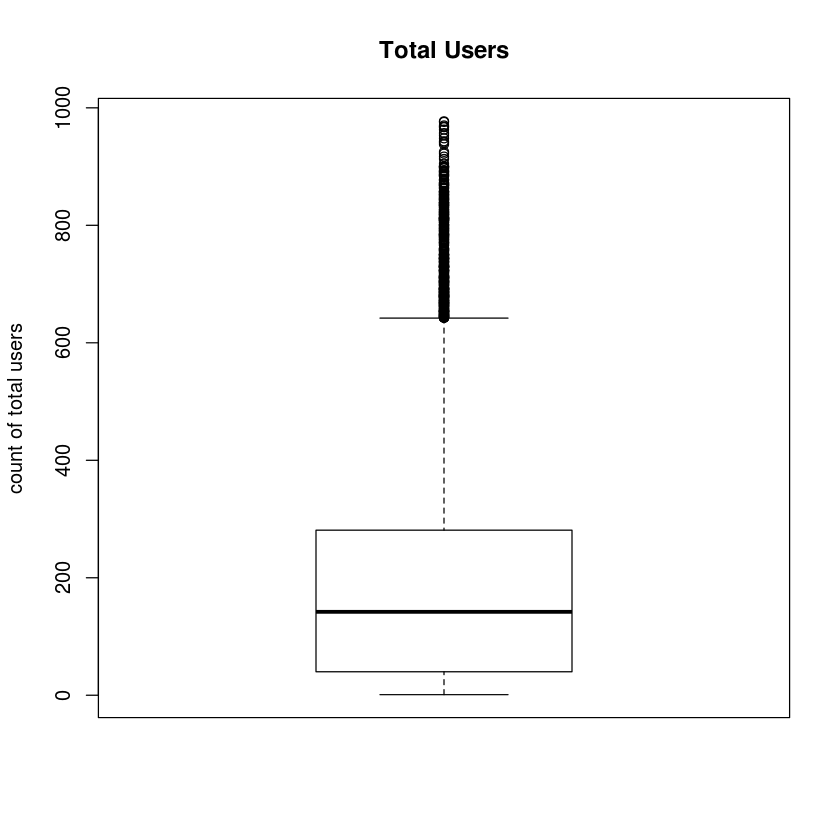

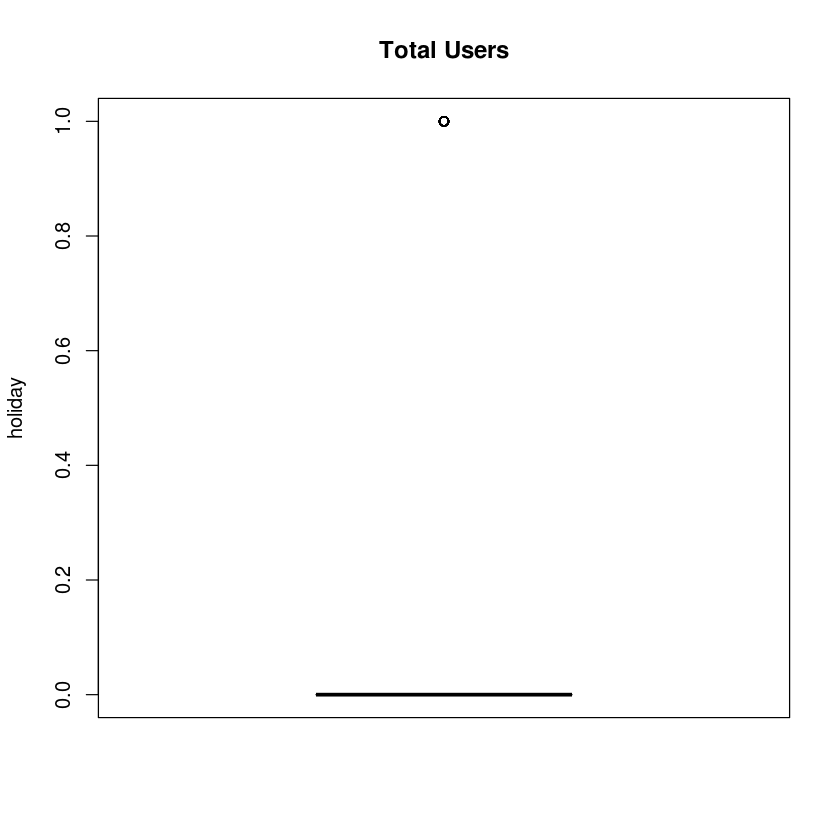

In [18]:
boxplot(data1$cnt, ylab = "count of total users", main = "Total Users") + boxplot(data1$holiday, ylab = "holiday", main = "Total Users") 

In [ ]:
boxplot(data$cnt, ylab = "count of total users", main = "Total Users")

In [ ]:
data$cnt1 = log(data$cnt)
data$cnt1[data$cnt1 == -Inf] = -0.8
boxplot(data$cnt1, ylab = "count of total users", main = "Total Users")

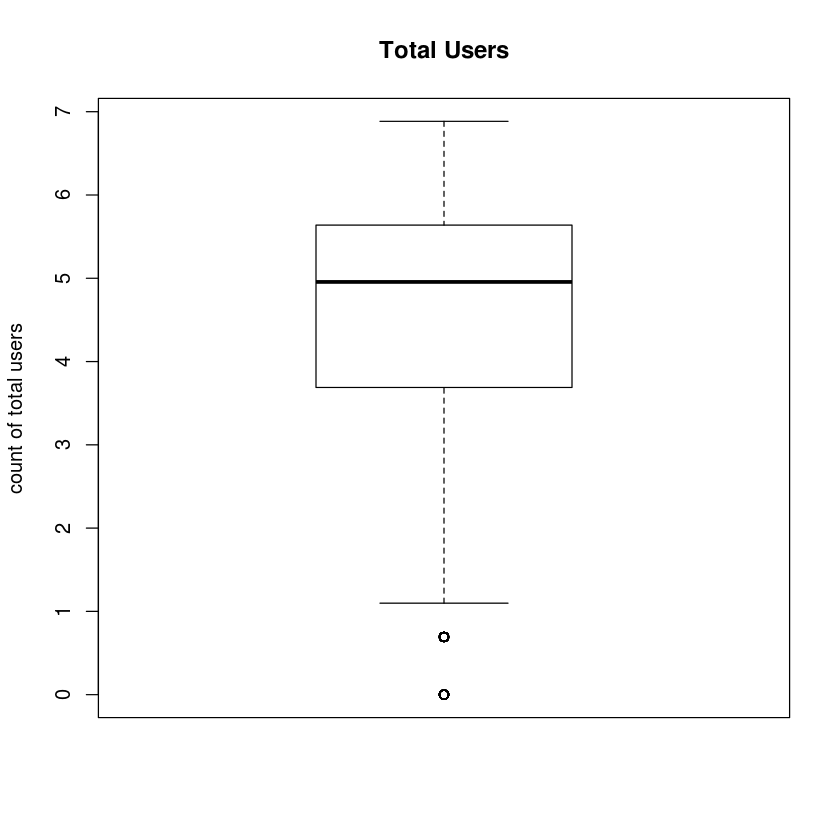

In [10]:
count_ts = ts(log(data[, c('cnt')]))
data$clean_cnt = tsclean(count_ts)
boxplot(data$clean_cnt, ylab = "count of total users", main = "Total Users")

In [20]:
form = clean_cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + temp + hum + windspeed
model = lm(form, data = data)
summary(model)


Call:
lm(formula = form, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3009 -0.3013  0.0306  0.3800  2.5284 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.649427   0.040314  65.719  < 2e-16 ***
season2      0.318374   0.029822  10.676  < 2e-16 ***
season3      0.374642   0.035312  10.609  < 2e-16 ***
season4      0.613322   0.029983  20.456  < 2e-16 ***
yr1          0.472633   0.009599  49.237  < 2e-16 ***
mnth2        0.112985   0.024071   4.694 2.70e-06 ***
mnth3        0.129237   0.027068   4.775 1.82e-06 ***
mnth4        0.087718   0.040216   2.181  0.02918 *  
mnth5        0.218230   0.043019   5.073 3.96e-07 ***
mnth6        0.106982   0.044178   2.422  0.01546 *  
mnth7       -0.041372   0.049585  -0.834  0.40409    
mnth8        0.022954   0.048213   0.476  0.63401    
mnth9        0.117899   0.042948   2.745  0.00605 ** 
mnth10       0.042241   0.039822   1.061  0.28881    
m

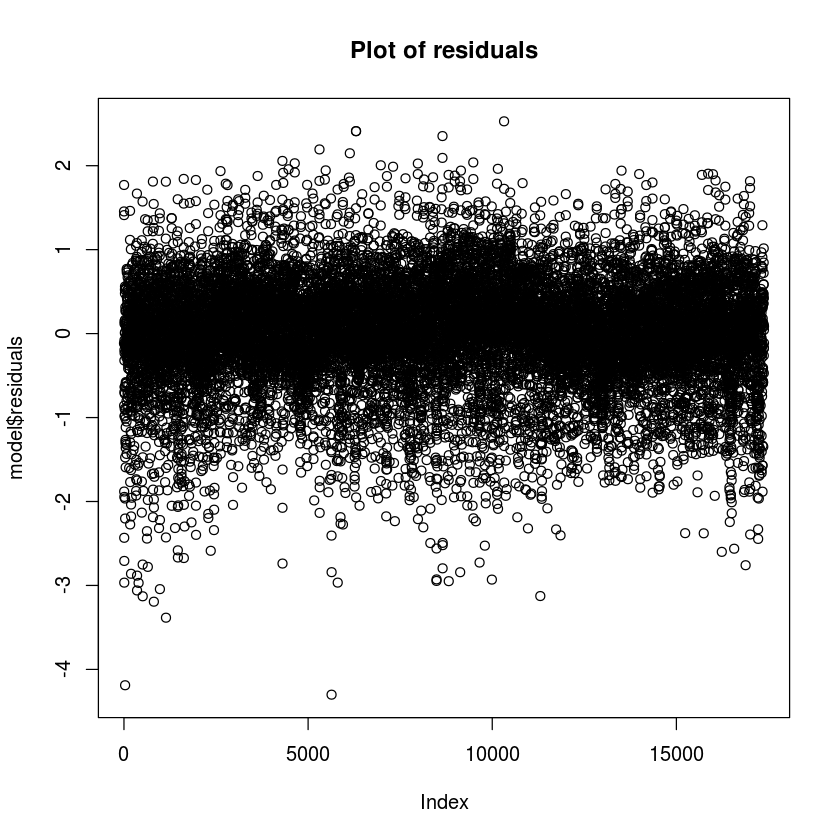

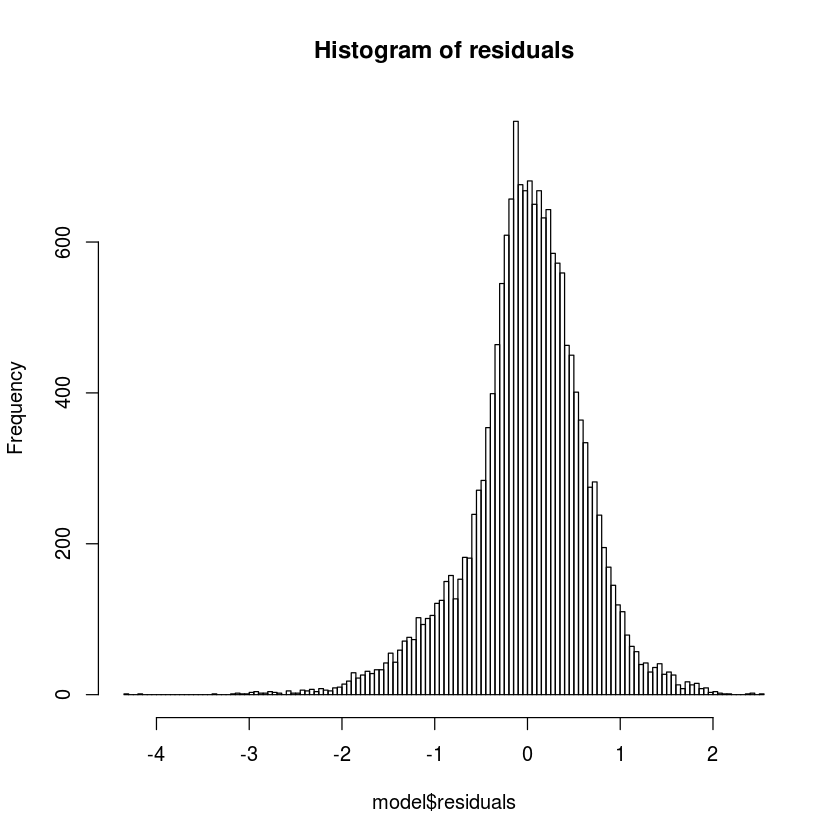

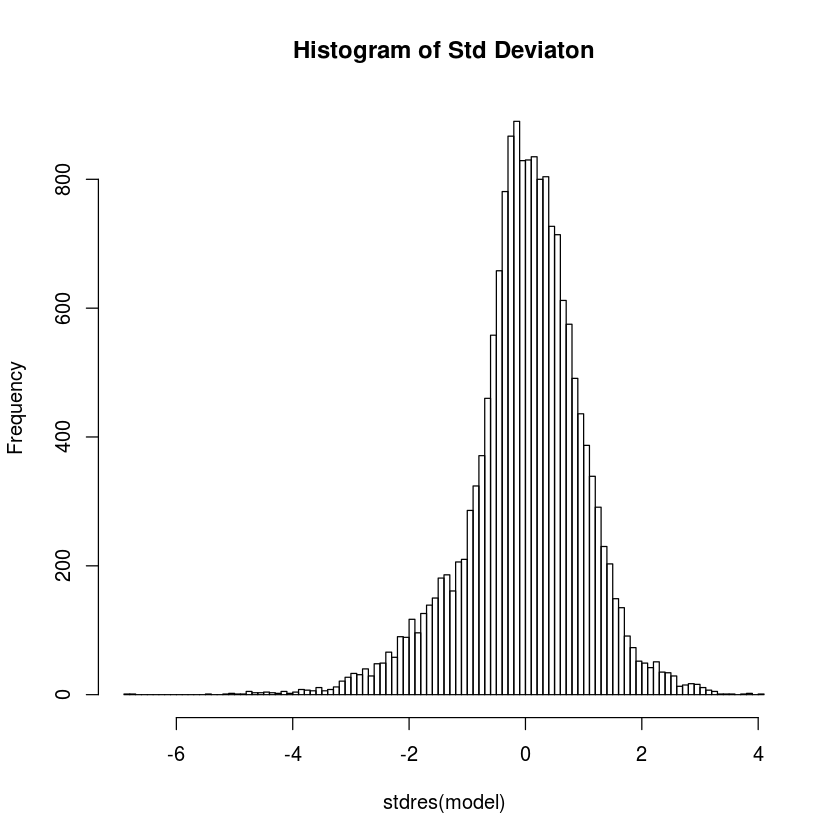

In [21]:
plot(model$residuals, main = "Plot of residuals")
hist(model$residuals, breaks = 100, main = "Histogram of residuals")
hist(stdres(model), breaks = 100, main = "Histogram of Std Deviaton")

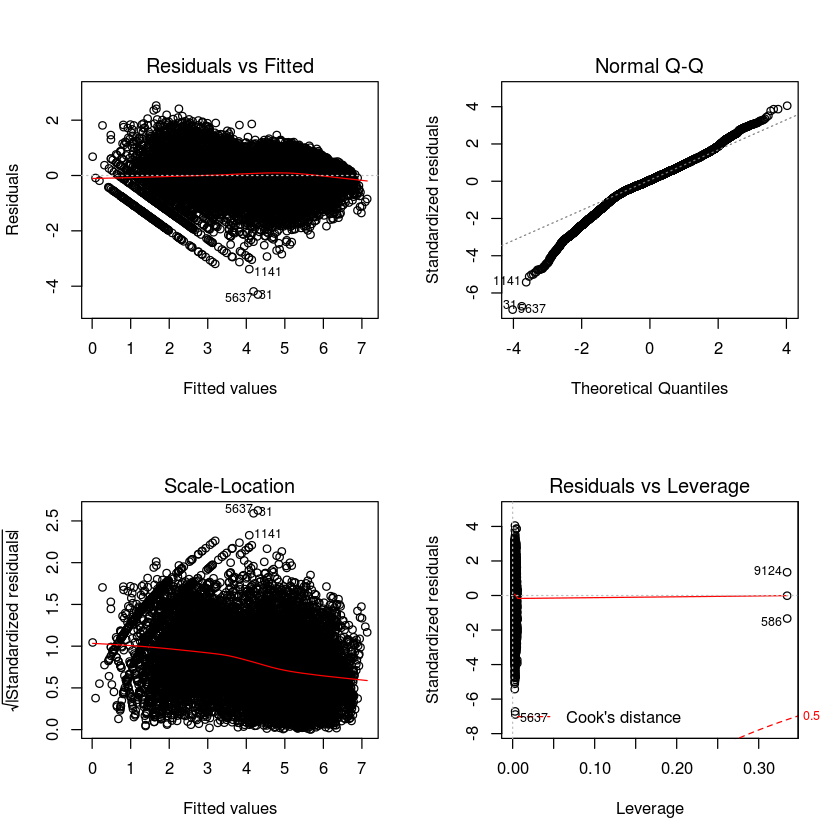

In [23]:
par(mfrow=c(2,2))
plot(model)


In [35]:
data_inf = data[-c(5637,31), ]

In [36]:
data_inf

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,holidregistereday,clean_cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0,2.7725887
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0,3.6888795
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0,3.4657359
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0,2.5649494
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0,0.0000000
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0,0.0000000
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0,0.6931472
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,0,1.0986123
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,0,2.0794415
10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,0,2.6390573


In [37]:
form = clean_cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + temp + hum + windspeed
model = lm(form, data = data_inf)
summary(model)


Call:
lm(formula = form, data = data_inf)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3981 -0.3017  0.0314  0.3792  2.5279 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.653280   0.040211  65.984  < 2e-16 ***
season2      0.318451   0.029744  10.706  < 2e-16 ***
season3      0.374410   0.035220  10.631  < 2e-16 ***
season4      0.613247   0.029904  20.507  < 2e-16 ***
yr1          0.471479   0.009575  49.242  < 2e-16 ***
mnth2        0.109489   0.024013   4.560 5.16e-06 ***
mnth3        0.124956   0.027004   4.627 3.73e-06 ***
mnth4        0.082565   0.040117   2.058 0.039593 *  
mnth5        0.212305   0.042915   4.947 7.60e-07 ***
mnth6        0.100531   0.044073   2.281 0.022559 *  
mnth7       -0.048200   0.049466  -0.974 0.329863    
mnth8        0.019535   0.048097   0.406 0.684631    
mnth9        0.112075   0.042844   2.616 0.008907 ** 
mnth10       0.037345   0.039723   0.940 0.347165  

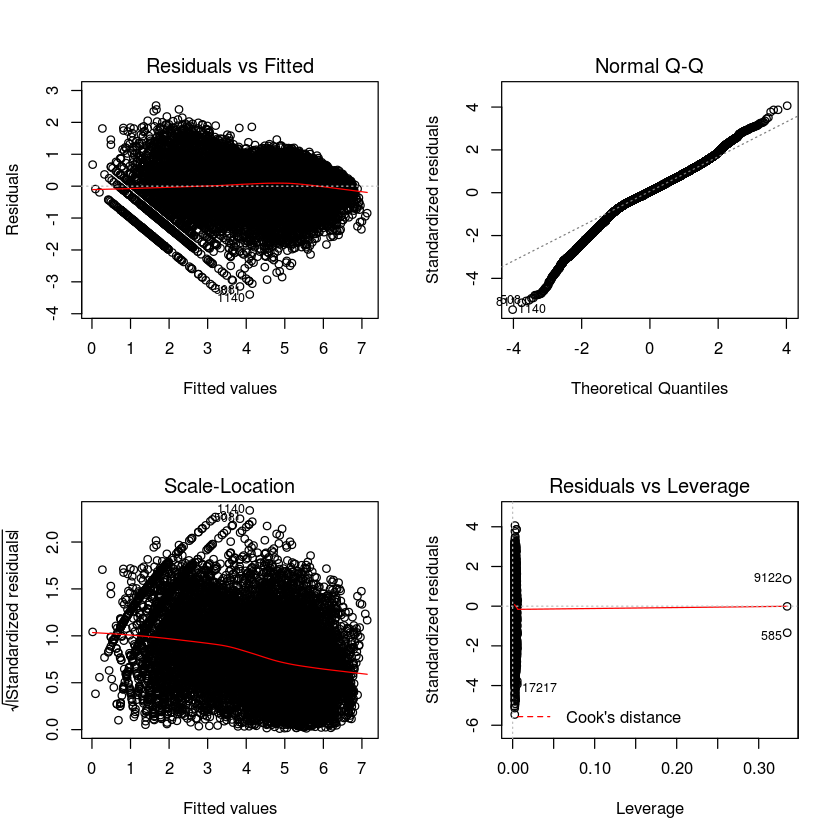

In [34]:
par(mfrow=c(2,2))
plot(model)